In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
# Leer datos de AENA estancos mensuales de 2016 a 2018
aena = pd.read_csv('201901_AENA_mensual_2017_2018.csv',encoding = 'iso-8859-1',delimiter = ';',thousands = '.')
aena.tail()

,fecha,aeropuerto,pasajeros,operaciones,mercancia
67,oct-18,El Prat,4542389,30616,17780313
68,nov-18,Barajas,4537521,33019,46911122
69,nov-18,El Prat,3444397,23743,15112312
70,dic-18,Barajas,4569991,33050,46148007
71,dic-18,El Prat,3498088,24901,14757904


In [3]:
# Separamos los datos en dos dataframes distintos
barajas = aena[aena['aeropuerto'] == 'Barajas'].reset_index()
elprat = aena[aena['aeropuerto'] == 'El Prat'].reset_index()

# Calculamos datos acumulados anuales (suma de 12 últimos meses)
barajas['pasajeros_cum'] = barajas['pasajeros'].rolling(12, min_periods=12).mean()
elprat['pasajeros_cum'] = elprat['pasajeros'].rolling(12, min_periods=12).mean()
barajas['mercancia_cum'] = barajas['mercancia'].rolling(12, min_periods=12).mean()
elprat['mercancia_cum'] = elprat['mercancia'].rolling(12, min_periods=12).mean()

# Eliminamos datos de 2016
#barajas= barajas.iloc[12:]
#elprat= elprat.iloc[12:]

# Calculamos diferencias entre variables de Barajas y El Prat
dif_pasajeros = barajas['pasajeros_cum'] - elprat['pasajeros_cum']
dif_mercancia = barajas['mercancia_cum'] - elprat['mercancia_cum']

x = barajas['fecha']

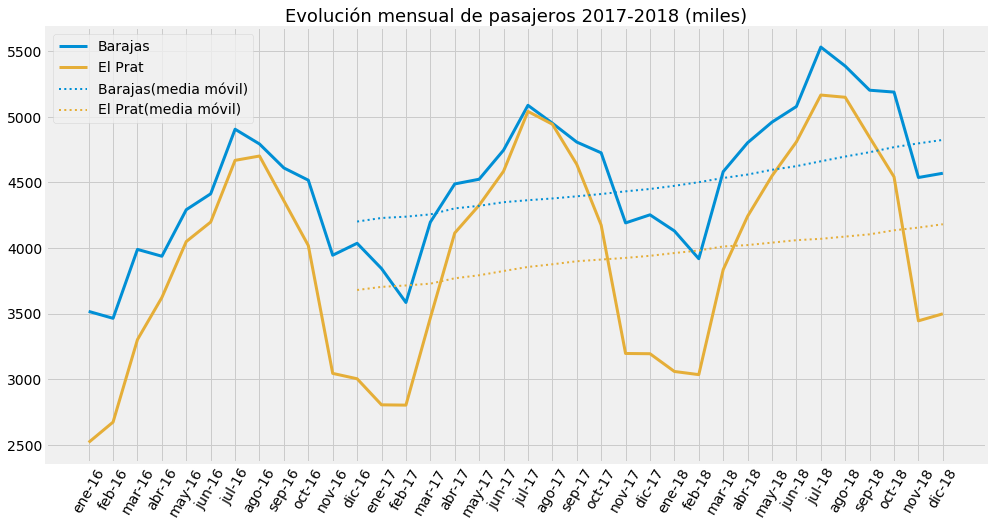

In [4]:
params = {'legend.fontsize': 14,
          'figure.figsize': (15, 8),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
plt.rcParams.update(params)

plt.plot(x, barajas['pasajeros']/1000,lw=3, ls='-', alpha=1, color=sns.color_palette()[0], label='Barajas')
plt.plot(x, elprat['pasajeros']/1000,lw=3, ls='-', alpha=1, color=sns.color_palette()[2], label='El Prat')
plt.plot(x, barajas['pasajeros_cum']/1000,lw=2, ls=':', alpha=1, color=sns.color_palette()[0], label='Barajas(media móvil)')
plt.plot(x, elprat['pasajeros_cum']/1000,lw=2, ls=':', alpha=1, color=sns.color_palette()[2], label='El Prat(media móvil)')

plt.xticks(x,rotation = 60)
plt.legend()
plt.title('Evolución mensual de pasajeros 2017-2018 (miles)',fontsize= 18)
plt.savefig('images/pasajeros_2017_2018.png', bbox_inches='tight', pad_inches=0.3, dpi=220)
plt.show()

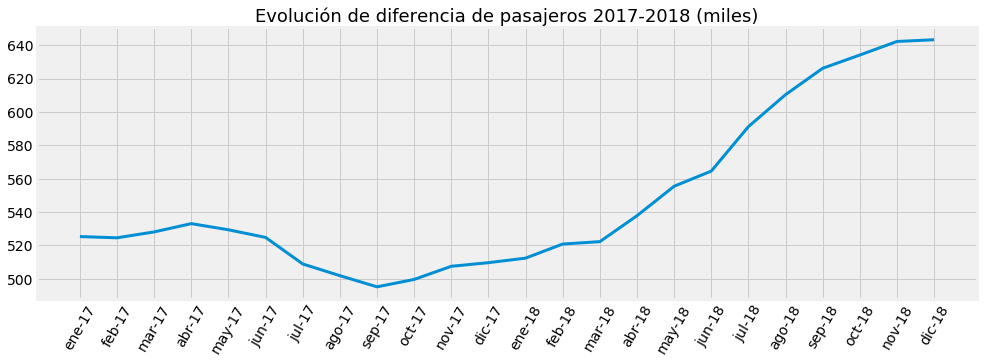

In [5]:
params = {'legend.fontsize': 14,
          'figure.figsize': (15, 5),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
plt.rcParams.update(params)

plt.plot(x.iloc[12:], dif_pasajeros.iloc[12:]/1000,lw=3, ls='-', alpha=1, color=sns.color_palette()[0])

#plt.axis(ymin= 0 , ymax=800)
plt.xticks(x.iloc[12:],rotation = 60)
plt.title('Evolución de diferencia de pasajeros 2017-2018 (miles)',fontsize= 18)
plt.savefig('images/dif_pasajeros_2017_2018.png', bbox_inches='tight', pad_inches=0.3, dpi=220)
plt.show()

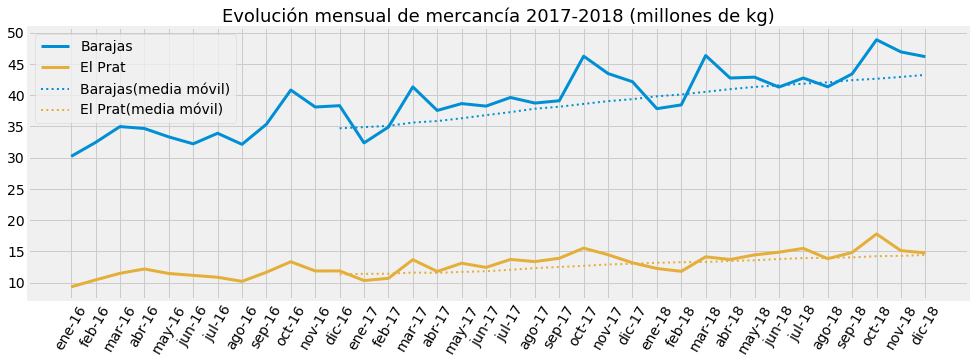

In [6]:
params = {'legend.fontsize': 14,
          'figure.figsize': (15, 5),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
plt.rcParams.update(params)

plt.plot(x, barajas['mercancia']/1000000,lw=3, ls='-', alpha=1, color=sns.color_palette()[0], label='Barajas')
plt.plot(x, elprat['mercancia']/1000000,lw=3, ls='-', alpha=1, color=sns.color_palette()[2], label='El Prat')
plt.plot(x, barajas['mercancia_cum']/1000000,lw=2, ls=':', alpha=1, color=sns.color_palette()[0], label='Barajas(media móvil)')
plt.plot(x, elprat['mercancia_cum']/1000000,lw=2, ls=':', alpha=1, color=sns.color_palette()[2], label='El Prat(media móvil) ')

plt.xticks(x,rotation = 60)
plt.legend()
plt.title('Evolución mensual de mercancía 2017-2018 (millones de kg)',fontsize= 18)
plt.savefig('images/mercancia_2017_2018.png', bbox_inches='tight', pad_inches=0.3, dpi=220)
plt.show()

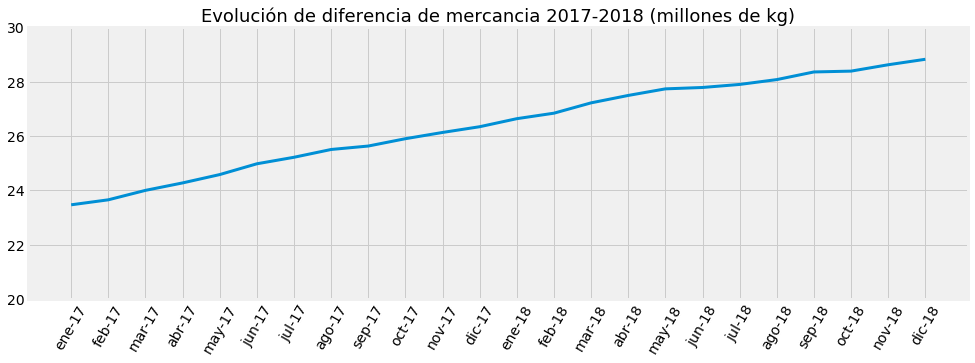

In [7]:
params = {'legend.fontsize': 14,
          'figure.figsize': (15, 5),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
plt.rcParams.update(params)

plt.plot(x.iloc[12:], dif_mercancia.iloc[12:]/1000000,lw=3, ls='-', alpha=1, color=sns.color_palette()[0])

plt.axis(ymin= 20 , ymax=30)
plt.xticks(x.iloc[12:],rotation = 60)
plt.title('Evolución de diferencia de mercancia 2017-2018 (millones de kg)',fontsize= 18)
plt.savefig('images/dif_mercancia_2017_2018.png', bbox_inches='tight', pad_inches=0.3, dpi=220)
plt.show()